<a href="https://colab.research.google.com/github/tuanky/DS-Unit-1-Build/blob/master/Suicides_Data_Project_1_Tuan_Ky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#upload from local 

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Research Question: 
*  What is the trend of suicides in the past decades?
*  What age group commit suicide the most?
*  Which gender commit suicide more?

Does the world have more suicides as the world get richer?
Which gender is more likely to commit suicide?

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as ticker

warnings.filterwarnings("ignore")

df = pd.read_csv('gdrive/My Drive/suicides.csv', sep=',')

In [0]:
df.shape

(27820, 12)

In [0]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [0]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [0]:
#dropping HDI and country - year due to insignificant and missing values
df = df.rename({df.columns[9] : 'GDP for year', df.columns[10] : 'GDP per Capita'}, axis=1)
df = df.drop(['country-year', 'HDI for year'], axis = 1)
#dropping 2016 data since incomplete

# sum suicides by year shows 2016 only has 10k vs 200k in 2015, thus incomplete
df = df[df['year'] < 2016] #dropping 2016 year

#Country GPD for that year 
df['GDP for year'] = df['GDP for year'].apply(lambda x:x.replace(',', '')).astype(np.int64)


In [0]:
dfus = df[df['country'] == 'United States']
dfus.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,GDP for year,GDP per Capita,generation
27215,United States,2015,female,25-34 years,1444,21555712,6.70,18120714000000,60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,18120714000000,60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,18120714000000,60387,Silent
27218,United States,2015,male,5-14 years,255,21273987,1.20,18120714000000,60387,Generation Z
27219,United States,2015,female,5-14 years,158,20342901,0.78,18120714000000,60387,Generation Z


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 10 columns):
country              27660 non-null object
year                 27660 non-null int64
sex                  27660 non-null object
age                  27660 non-null object
suicides_no          27660 non-null int64
population           27660 non-null int64
suicides/100k pop    27660 non-null float64
GDP for year         27660 non-null int64
GDP per Capita       27660 non-null int64
generation           27660 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 2.3+ MB


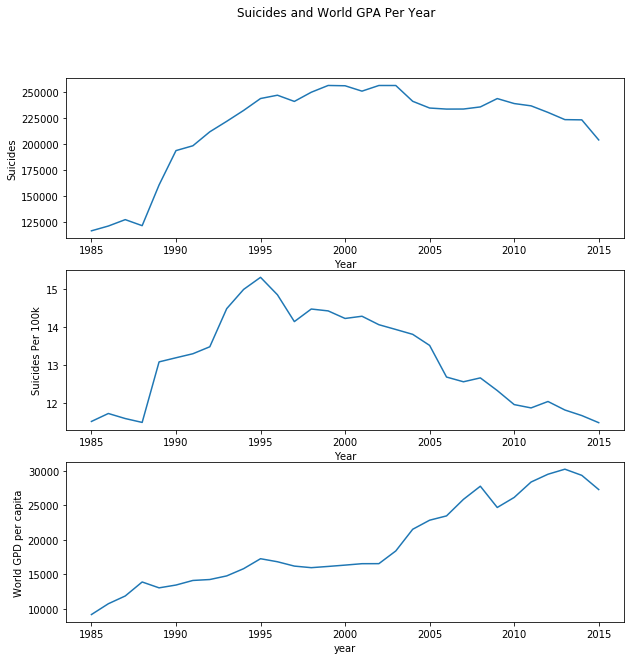

In [0]:
#Suicides Globally

population_year = df.groupby('year').sum().population.values
suicides_year = df.groupby('year').sum().suicides_no.values
suicides_rate = (suicides_year / population_year) * 100000
years = np.unique(df['year'].values)

suicides_per_year = {"Year": years, "Suicides": suicides_year}
suicides_per_year_df = pd.DataFrame(suicides_per_year) 
suicidesrate_per_year = {"Year": years, "Suicides per 100k": suicides_rate}
suicidesrate_per_year_df = pd.DataFrame(suicidesrate_per_year) 
#calculating world gpd per capita via df method
end = df["year"] <= 2015
start = df["year"] >= 1985
s = df[start & end]
df1 = s.groupby(["year","GDP for year"])["suicides/100k pop"].sum().reset_index()
df5 = df1.groupby(["year"])["GDP for year"].sum().reset_index()
df8 = s.groupby(["year"])['population'].sum().reset_index()
df5['World GPD per capita'] = df5['GDP for year'] / df8['population']

#plotting the line graph

fig,axes = plt.subplots(3,1, figsize = (10, 10))
fig.suptitle("Suicides and World GPA Per Year")
ax = plt.subplot(3,1,1)
ax = sns.lineplot(x = "Year", y = "Suicides", data = suicides_per_year_df)

#plotting suicide rate

ax2 = plt.subplot(3,1,2)
ax2 = sns.lineplot(years, suicides_rate)
ax2.set_ylabel('Suicides Per 100k')
ax2.set_xlabel('Year')

#plotting  world GPD per capita 
ax10 = plt.subplot(3,1,3)

ax = sns.lineplot(x = "year", y = "World GPD per capita", data = df5)
plt.show()

Suicides rates and count increases from 1985 to 1995, then from 1995 to 2005, suicide counts stay around the same as population increases (suicide rate decreases). There is sharp jump from 1996 to 1998 in both suicide rate and count probably due to financial crisis in 1997. Overall, suicides have been decreasing since 2000. 

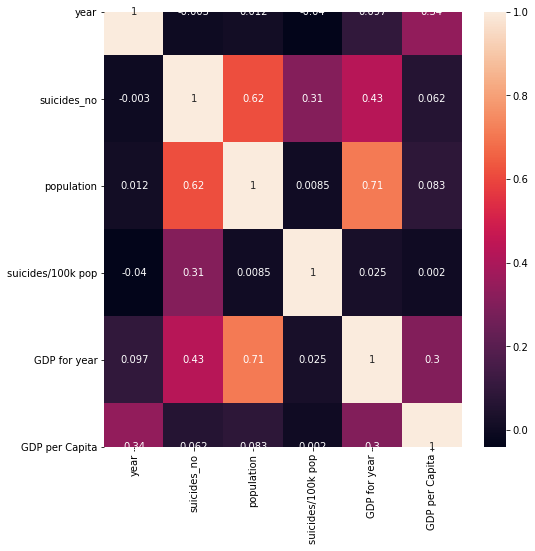

In [0]:
#looking at correlation 
fig,axes = plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)
plt.show()

* population and suicides have strong positive correlation with .61 meaning as population increases, suicide counts increases
* GDP for year and suicides have some positive correlation with .43, the richer the World gets, more people commit suicide. 



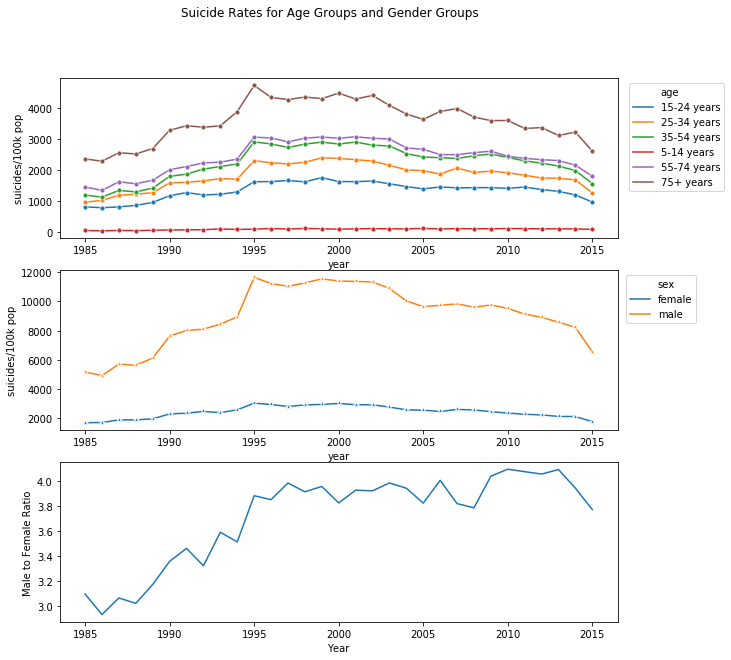

In [0]:
#using time series to plot age and sex per year globally

end = df["year"] <= 2015
start = df["year"] >= 1985
s = df[start & end]
aget = s.groupby(["year","age"])["suicides/100k pop"].sum().reset_index()
sext = s.groupby(["year","sex"])["suicides/100k pop"].sum().reset_index()

#calculating ratios to be more precise 
female_suicides_100k_pop = sext[sext['sex'] == 'female'].reset_index()
male_suicides_100k_pop = sext[sext['sex'] == 'male'].reset_index()
ratio = male_suicides_100k_pop['suicides/100k pop'] / female_suicides_100k_pop['suicides/100k pop']

years = male_suicides_100k_pop['year']
suicide_ratio_year = {"Year": years, "Male to Female Ratio": ratio}
suicide_ratio_year_df = pd.DataFrame(suicide_ratio_year) 


fig,axes = plt.subplots(3,1, figsize = (10, 10))
# set main title for all subplots
fig.suptitle("Suicide Rates for Age Groups and Gender Groups")
ax3 = plt.subplot(3,1,1)
sns.lineplot(x= "year",y = "suicides/100k pop", data = aget, 
             hue = "age",marker = "o",markersize = 5)

# adjust the legend position outside the graph since it blocks the points
ax3.legend(loc = "upper right",bbox_to_anchor=(1.2,1))

ax4 = plt.subplot(3,1,2)
sns.lineplot(x= "year",y = "suicides/100k pop", data = sext, 
             hue = "sex",marker = "*")
# adjust the legend position outside the graph since it blocks the points
ax4.legend(loc = "upper right",bbox_to_anchor=(1.15,1))

ax4 = plt.subplot(3,1,3)
ax5 = sns.lineplot(x = "Year", y = "Male to Female Ratio", data = suicide_ratio_year_df)

plt.show()

In [0]:
s

,country,year,sex,age,suicides_no,population,suicides/100k pop,GDP for year,GDP per Capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,63067077179,2309,Generation Z


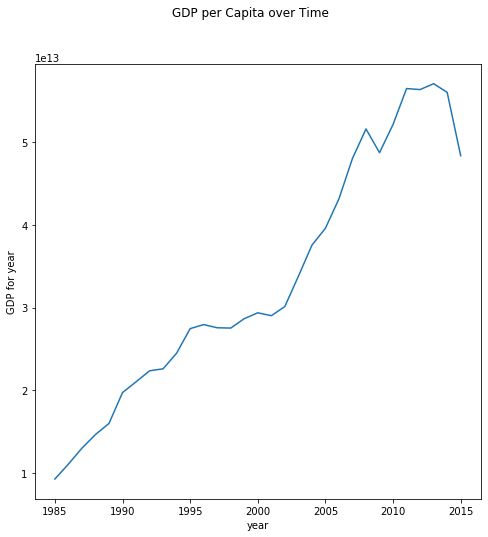

,year,GDP for year
0,1985,9247062852875
1,1986,11050802665239
2,1987,12980823522850
3,1988,14629807600373
4,1989,15968188470598
5,1990,19705366663084
6,1991,21008574050870
7,1992,22342317707336
8,1993,22586418285399
9,1994,24477470310305


In [0]:

fig,axes = plt.subplots( figsize = (8, 8))
fig.suptitle("GDP per Capita over Time")


ax = sns.lineplot(x = "year", y = "GDP for year", data = df5)
plt.show()
df5

In [0]:
df1

,year,population
0,1985,1008600086
1,1986,1029909613
2,1987,1095029726
3,1988,1054094424
4,1989,1225514347
5,1990,1466620100
6,1991,1489988384
7,1992,1569539447
8,1993,1530416654
9,1994,1548749372


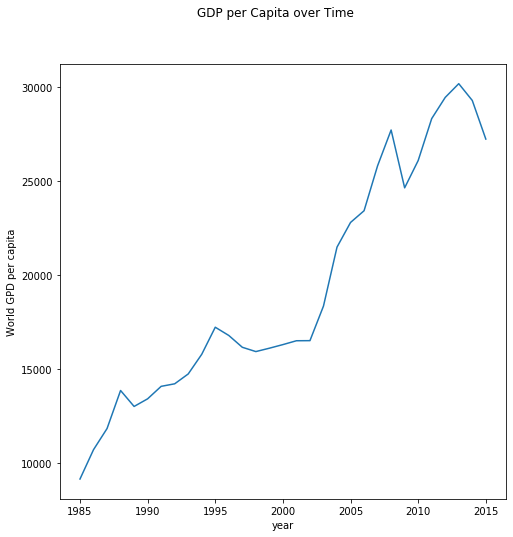

,year,GDP for year,World GPD per capita
0,1985,9247062852875,9168.215412
1,1986,11050802665239,10729.876220
2,1987,12980823522850,11854.311545
3,1988,14629807600373,13879.029494
4,1989,15968188470598,13029.785012
5,1990,19705366663084,13435.903860
6,1991,21008574050870,14099.824050
7,1992,22342317707336,14234.951374
8,1993,22586418285399,14758.345857
9,1994,24477470310305,15804.668433


In [0]:
#plot of world GDP per capita


In [0]:
suicide_ratio_year_df

,Year,Male to Female Ratio
0,1985,3.094299
1,1986,2.930492
2,1987,3.062788
3,1988,3.019800
4,1989,3.170125
5,1990,3.355153
6,1991,3.458842
7,1992,3.319771
8,1993,3.587338
9,1994,3.510646


* Male has roughly 3 times as female in suicide rate from 1985 to 1995, then from 1995 and onwards it jumps to about 4 times as femaile suicide rate and peaked at  4.08 in 2014. Although the total suicide rates decreases from 1995 to 2015, the gender ratio is still roughly 4:1 (male to female). The recession years from 2008-2013 has the ratio over 4.0. 
* 75+ age group has the highest suicide rate and 5-15 has the least 

In [0]:
#looking a the list of unique countries 
countries = np.unique(df['country'].values)
len(countries)

100

In [0]:
#experimenting with heat map geo but it's not visualized enough
import plotly.graph_objs as go


fig = go.Figure(data=go.Choropleth(
    locations=df3['country'],
    z = df2['suicides_no'].astype(float),
    locationmode = 'country names',
    colorscale = 'Reds',
    colorbar_title = "Inflation Annual CPI"))

fig.update_layout(
    title_text = 'Suicide Counts',
    geo_scope='world',
)


fig.show()